In [3]:
from __future__ import print_function

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import bonvoyage

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'bonvoyage')))


# Define folder to save figures
folder = 'figures/002_waypointplots'
!mkdir -p $folder


data = pd.read_csv('data.csv', index_col=0)
data.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,perfect_middle_noise0_iter0,middle0_00_noise0_iter0,middle0_01_noise0_iter0,middle0_02_noise0_iter0,middle0_03_noise0_iter0,middle0_04_noise0_iter0,middle0_05_noise0_iter0,middle0_06_noise0_iter0,middle0_07_noise0_iter0,middle0_08_noise0_iter0,...,bimodal_91_noise95_iter9,bimodal_92_noise95_iter9,bimodal_93_noise95_iter9,bimodal_94_noise95_iter9,bimodal_95_noise95_iter9,bimodal_96_noise95_iter9,bimodal_97_noise95_iter9,bimodal_98_noise95_iter9,perfect_included_noise95_iter9,perfect_excluded_noise95_iter9
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.589527,0.774932,0.499504,0.150024,0.380721,0.810271,0.485884,0.549952,0.808396,0.996400
1,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.341090,0.505881,0.186781,0.778117,0.172168,0.683624,0.083816,0.243291,0.449720,0.731521
2,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.826827,0.361595,0.797055,0.316820,0.650798,0.158716,0.320548,0.981323,0.985146,0.658254
4,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.414055,0.679284,0.123933,0.273319,0.668118,0.262305,0.260800,0.027293,0.845871,0.309283


In [5]:
waypoints = pd.read_csv('waypoints.csv', index_col=0)
waypoints.head()

,0,1
perfect_middle_noise0_iter0,0.00,0.0
middle0_00_noise0_iter0,0.01,0.0
middle0_01_noise0_iter0,0.02,0.0
middle0_02_noise0_iter0,0.03,0.0
middle0_03_noise0_iter0,0.04,0.0


In [6]:
metadata = pd.read_csv('metadata.csv')
metadata.head()

,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [7]:
import bonvoyage

In [8]:
plot_kinds = 'scatter', 'hex'

In [9]:
folder

'figures/002_waypointplots'

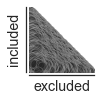

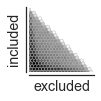

In [10]:

for kind in plot_kinds:
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    if kind == 'scatter':
        kwargs = {'rasterized': True, 'alpha': 0.5}
    else:
        kwargs = {}
    
    bonvoyage.waypointplot(waypoints, kind=kind, **kwargs)
    fig.tight_layout()
    fig.savefig('{}/waypoints_all_{}.pdf'.format(folder, kind), dpi=300)

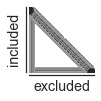

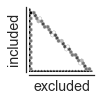

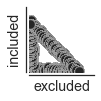

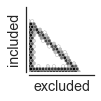

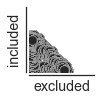

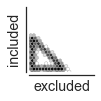

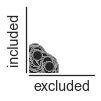

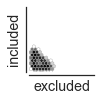

In [11]:
noise_percentages = 0, 25, 50, 75

for noise_percentage in noise_percentages:
    
    rows = metadata['% Noise'] == noise_percentage
    feature_ids = metadata.loc[rows, 'Feature ID']
    
    waypoints_subset = waypoints.loc[feature_ids]
    for kind in plot_kinds:
        fig, ax = plt.subplots(figsize=(1.5, 1.5))
        kwargs = {'rasterized': True, 'alpha': 0.5} if kind == 'scatter' else {}
        
        bonvoyage.waypointplot(waypoints_subset, kind=kind, **kwargs)
        fig.tight_layout()
        fig.savefig('{}/waypoints_noise{}_{}.pdf'.format(folder, noise_percentage, kind), dpi=300)

In [12]:
tidy_metadata = pd.read_csv('metadata.csv')
print(tidy_metadata.shape)
tidy_metadata.head()

(5730000, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_middle_noise0_iter0,1,0.5,0,0,perfect,middle,noise0,iter0
2,perfect_middle_noise0_iter0,2,0.5,0,0,perfect,middle,noise0,iter0
3,perfect_middle_noise0_iter0,3,0.5,0,0,perfect,middle,noise0,iter0
4,perfect_middle_noise0_iter0,4,0.5,0,0,perfect,middle,noise0,iter0


In [13]:
# tidy_metadata = tidy_metadata.drop('Sample ID', axis=1)
tidy_metadata = tidy_metadata.drop_duplicates(subset=['Feature ID'])
print(tidy_metadata.shape)
tidy_metadata.head()

(57300, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
100,middle0_00_noise0_iter0,0,0.0,0,0,middle0,00,noise0,iter0
200,middle0_01_noise0_iter0,0,0.0,0,0,middle0,01,noise0,iter0
300,middle0_02_noise0_iter0,0,0.0,0,0,middle0,02,noise0,iter0
400,middle0_03_noise0_iter0,0,0.0,0,0,middle0,03,noise0,iter0


In [14]:
noise_levels = tidy_metadata['% Noise'].isin([0, 25, 50, 75])

perfects = tidy_metadata['Feature ID'].str.contains('perfect')
middles = tidy_metadata['Feature ID'].str.startswith('middle') #& tidy_metadata['id1'].isin(['25', '50', '75'])
bimodals = tidy_metadata['Feature ID'].str.startswith('bimodal') #& tidy_metadata['id1'].isin(['25', '50', '75'])

row_subsets = perfects, bimodals, middles


In [15]:
dfs = []

for rows in row_subsets:
    df = tidy_metadata.loc[rows & noise_levels]
    dfs.append(df)
tidy_subset = pd.concat(dfs, ignore_index=True)
six.print_(tidy_subset.shape)
tidy_subset.head()

(9300, 9)


,Feature ID,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
0,perfect_middle_noise0_iter0,0,0.5,0,0,perfect,middle,noise0,iter0
1,perfect_included_noise0_iter0,0,1.0,0,0,perfect,included,noise0,iter0
2,perfect_excluded_noise0_iter0,0,0.0,0,0,perfect,excluded,noise0,iter0
3,perfect_middle_noise25_iter0,0,0.5,0,25,perfect,middle,noise25,iter0
4,perfect_included_noise25_iter0,0,1.0,0,25,perfect,included,noise25,iter0


In [16]:
figure_folder = 'figures/002_waypointplots'
! mkdir -p $figure_folder

In [17]:
%matplotlib inline

In [18]:
from anchor import MODALITY_TO_COLOR

In [19]:
from bonvoyage.visualize import NEAR_ZERO, NEAR_ONE

In [46]:
sns.set(style='white', context='paper')

bimodal
	 (3069, 10)
middle0
	 (3069, 10)
middle1
	 (3069, 10)
perfect
	 (93, 10)


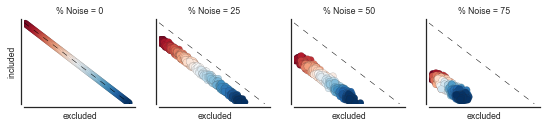

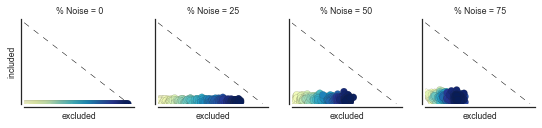

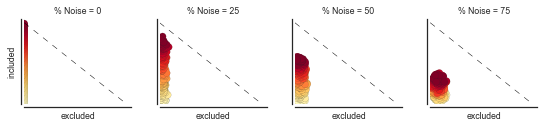

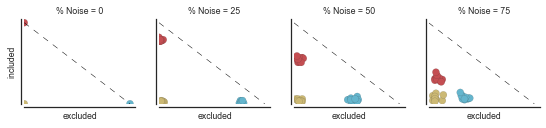

In [58]:
def waypointplot_facet(**kwargs):
    data = kwargs.pop('data')
    return bonvoyage.waypointplot(data, **kwargs)

def scatter(x, y, *args, **kwargs):
    """Special scatter that assigns unique colors to each point based on the palette"""
    palette = kwargs.pop('palette')
    kwargs.pop('color')
    if isinstance(palette, str):
        color = sns.color_palette(palette, n_colors=len(x))
    else:
        color = palette[x.index]
    return plt.scatter(x, y, color=color, *args, **kwargs)
                              
for group, df in tidy_subset.groupby('id0'):
    palette = None
    six.print_(group)
    
    waypoints_subset = waypoints.loc[df['Feature ID']]
    data = pd.concat([waypoints_subset, df.set_index('Feature ID')], axis=1)
    data = data.rename(columns={'0': NEAR_ZERO, '1': NEAR_ONE})
    data = data.sort_values('id1')
    print('\t', data.shape)
#     print(data[[0, 1]].head())

    if group == 'bimodal':
        palette = "RdBu"
    elif group == 'middle0':
        palette = 'YlGnBu'
    elif group == 'middle1':
        palette = 'YlOrRd'
    elif group == 'perfect':
        palette = pd.Series([MODALITY_TO_COLOR[m] for m in data['id1']], index=data.index)
        
    g = sns.FacetGrid(col='% Noise', data=data, aspect=1, size=2)
    g.map(scatter, NEAR_ZERO, NEAR_ONE, linewidth=0.1,
          edgecolor='#262626', palette=palette, rasterized=True)
    sns.despine(offset=3)
    g.set(#xlabel=NEAR_ZERO, ylabel=NEAR_ONE,
           xticks=[], yticks=[], ylim=(0, 1.05),
           xlim=(0, 1.05))
    for ax in g.axes.flat:
        ax.plot([0, 1], [1, 0], color='k', linewidth=0.5, linestyle='--')

#     if group == 'perfect':
#         for ax in g.axes.flat:
#             plt.setp(ax.get_xticklabels(), rotation=30)
    g.savefig('{}/data_{}_waypoints.pdf'.format(figure_folder, group))

In [35]:
data.head()

,excluded,included,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
Feature ID,,,,,,,,,,
middle1_00_noise0_iter0,0.00,0.01,0,1.000000,0,0,middle1,00,noise0,iter0
middle1_00_noise50_iter1,0.06,0.08,0,0.051019,1,50,middle1,00,noise50,iter1
middle1_00_noise50_iter8,0.05,0.03,0,0.246821,8,50,middle1,00,noise50,iter8
middle1_00_noise50_iter7,0.05,0.07,0,1.000000,7,50,middle1,00,noise50,iter7
middle1_00_noise75_iter6,0.10,0.12,0,1.000000,6,75,middle1,00,noise75,iter6


In [36]:
data.tail()

,excluded,included,Sample ID,$\Psi$,Iteration,% Noise,id0,id1,id2,id3
Feature ID,,,,,,,,,,
middle1_98_noise25_iter4,0.04,0.76,0,1.000000,4,25,middle1,98,noise25,iter4
middle1_98_noise25_iter5,0.01,0.80,0,1.000000,5,25,middle1,98,noise25,iter5
middle1_98_noise50_iter0,0.02,0.54,0,0.934804,0,50,middle1,98,noise50,iter0
middle1_98_noise75_iter3,0.05,0.35,0,0.044766,3,75,middle1,98,noise75,iter3
middle1_98_noise75_iter9,0.14,0.27,0,0.270905,9,75,middle1,98,noise75,iter9


In [23]:

data.columns

Index([u'excluded', u'included', u'Sample ID', u'$\Psi$', u'Iteration',
       u'% Noise', u'id0', u'id1', u'id2', u'id3'],
      dtype='object')